In [280]:
!pip install yfinance pandas numpy matplotlib sklearn seaborn

In [281]:
import yfinance as yf
data = yf.download("^GSPC", start="2014-01-01", end="2024-01-01")

[*********************100%%**********************]  1 of 1 completed


In [282]:
type(data)

pandas.core.frame.DataFrame

In [283]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000


              Open         High          Low        Close    Adj Close  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2516.000000   
mean   3005.389613  3021.660506  2987.916490  3005.883140  3005.883140   
std     901.033279   907.231642   894.901408   901.337964   901.337964   
min    1743.819946  1755.790039  1737.920044  1741.890015  1741.890015   
25%    2122.937439  2129.630066  2114.255005  2124.267517  2124.267517   
50%    2797.145020  2808.765015  2781.670044  2798.160034  2798.160034   
75%    3909.694946  3930.682434  3876.757568  3907.079956  3907.079956   
max    4804.509766  4818.620117  4780.979980  4796.560059  4796.560059   

             Volume  
count  2.516000e+03  
mean   3.950307e+09  
std    9.665768e+08  
min    1.296530e+09  
25%    3.358652e+09  
50%    3.766130e+09  
75%    4.306835e+09  
max    9.976520e+09  


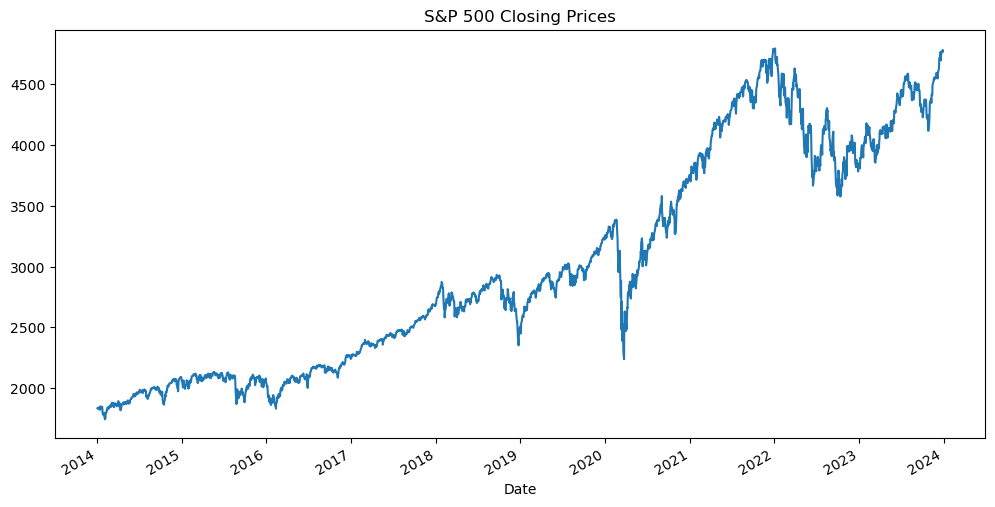

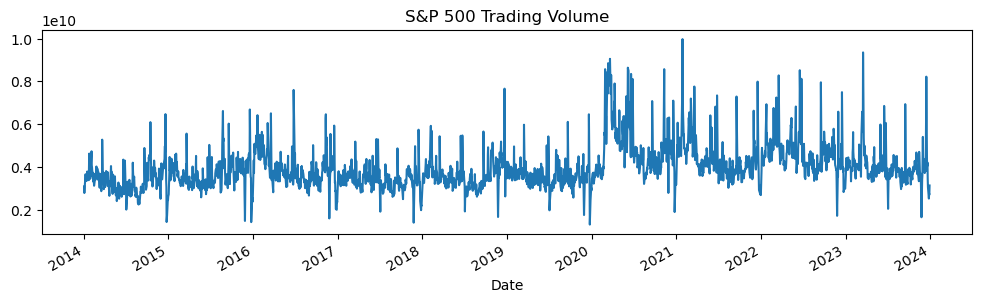

In [284]:
import matplotlib.pyplot as plt

# Basic statistics
print(data.describe())

# Visualizations
# Price chart
data['Close'].plot(figsize=(12,6), title='S&P 500 Closing Prices')
plt.show()

# Volume chart
data['Volume'].plot(figsize=(12,3), title='S&P 500 Trading Volume')
plt.show()

In [285]:
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()

# Bollinger Bands
data['Middle_Band'] = data['Close'].rolling(window=20).mean()
data['Upper_Band'] = data['Middle_Band'] + 2 * data['Close'].rolling(window=20).std()
data['Lower_Band'] = data['Middle_Band'] - 2 * data['Close'].rolling(window=20).std()

In [286]:
import numpy as np 
data['Target'] = np.where(data['Close'].shift(1) > data['Close'], 1, 0)

In [287]:
data.head(20)

,Open,High,Low,Close,Adj Close,Volume,SMA_50,SMA_200,Middle_Band,Upper_Band,Lower_Band,Target
Date,,,,,,,,,,,,
2014-01-02,1845.859985,1845.859985,1827.739990,1831.979980,1831.979980,3080600000,NaN,NaN,NaN,NaN,NaN,0
2014-01-03,1833.209961,1838.239990,1829.130005,1831.369995,1831.369995,2774270000,NaN,NaN,NaN,NaN,NaN,1
2014-01-06,1832.310059,1837.160034,1823.729980,1826.770020,1826.770020,3294850000,NaN,NaN,NaN,NaN,NaN,1
2014-01-07,1828.709961,1840.099976,1828.709961,1837.880005,1837.880005,3511750000,NaN,NaN,NaN,NaN,NaN,0
2014-01-08,1837.900024,1840.020020,1831.400024,1837.489990,1837.489990,3652140000,NaN,NaN,NaN,NaN,NaN,1
2014-01-09,1839.000000,1843.229980,1830.380005,1838.130005,1838.130005,3581150000,NaN,NaN,NaN,NaN,NaN,0
2014-01-10,1840.060059,1843.150024,1832.430054,1842.369995,1842.369995,3335710000,NaN,NaN,NaN,NaN,NaN,0
2014-01-13,1841.260010,1843.449951,1815.520020,1819.199951,1819.199951,3591350000,NaN,NaN,NaN,NaN,NaN,1
2014-01-14,1821.359985,1839.260010,1821.359985,1838.880005,1838.880005,3353270000,NaN,NaN,NaN,NaN,NaN,0


In [288]:
data.dropna(inplace=True)

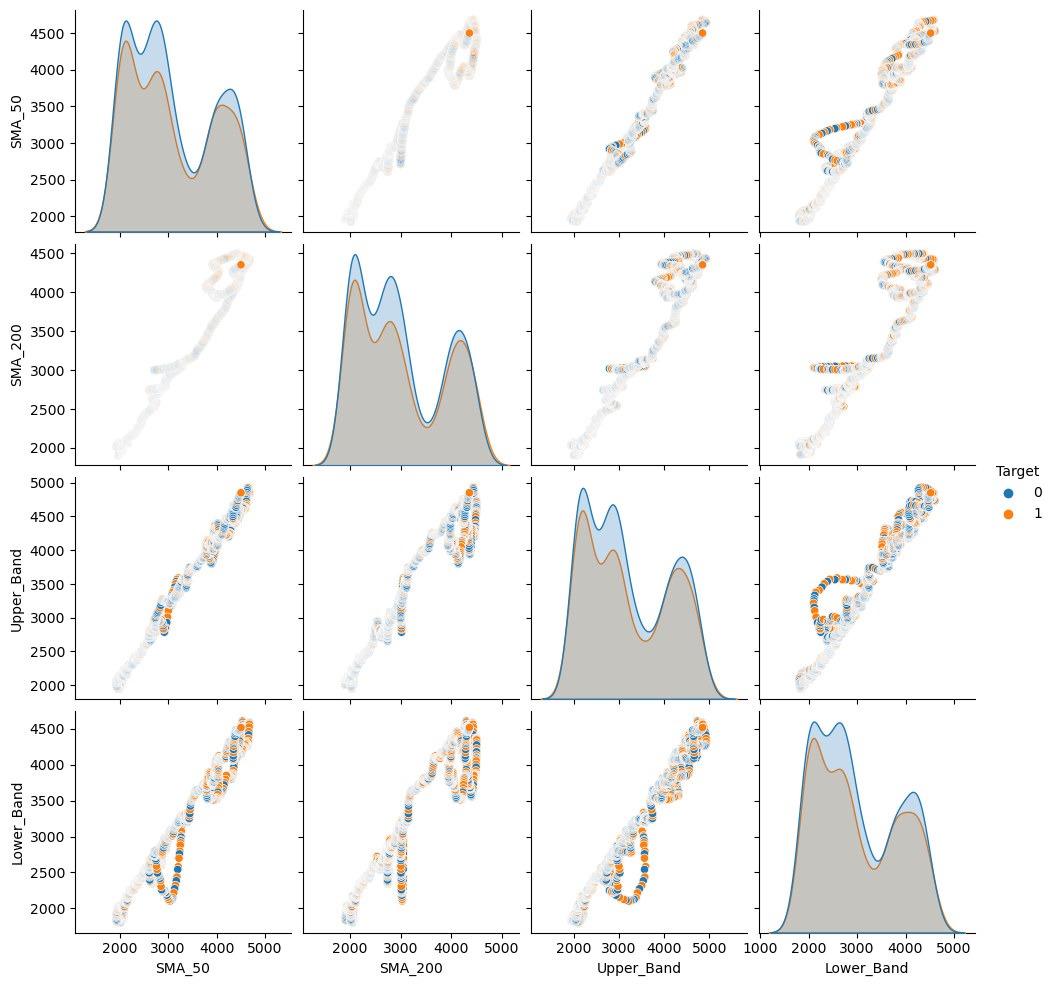

In [289]:
import seaborn as sns

sns.pairplot(data[['SMA_50', 'SMA_200', 'Upper_Band', 'Lower_Band', 'Target']], hue='Target')
plt.show()

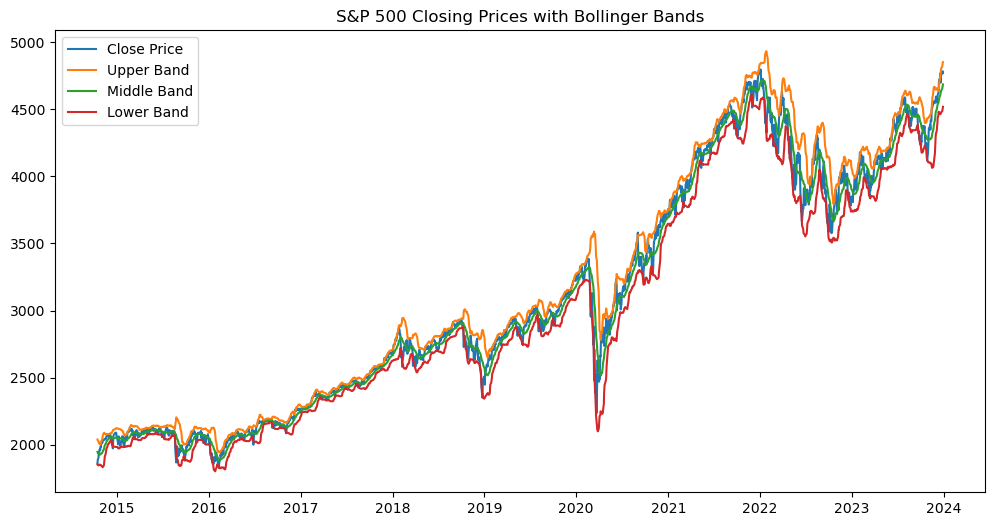

In [290]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['Upper_Band'], label='Upper Band')
plt.plot(data['Middle_Band'], label='Middle Band')
plt.plot(data['Lower_Band'], label='Lower Band')
plt.title('S&P 500 Closing Prices with Bollinger Bands')
plt.legend()
plt.show()

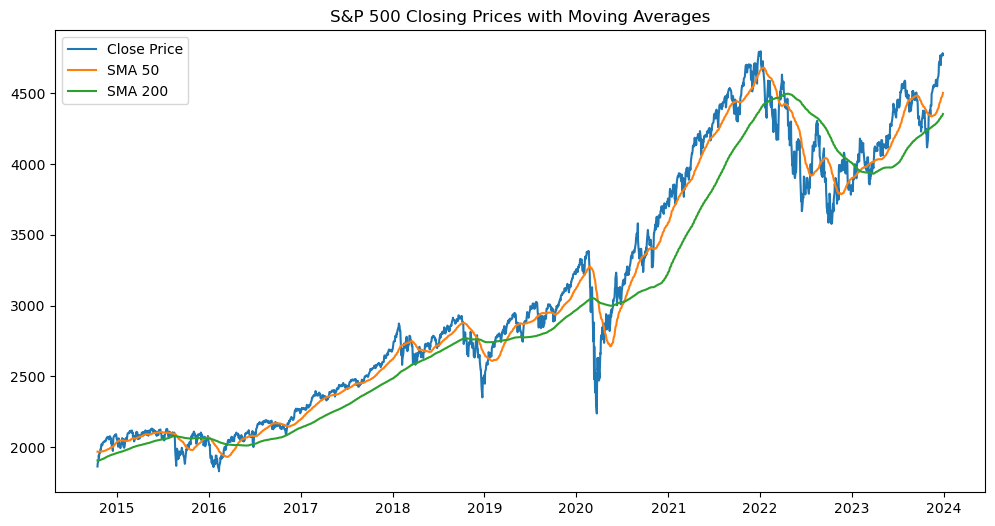

In [291]:
plt.figure(figsize=(12,6))
plt.plot(data['Close'], label='Close Price')
plt.plot(data['SMA_50'], label='SMA 50')
plt.plot(data['SMA_200'], label='SMA 200')
plt.title('S&P 500 Closing Prices with Moving Averages')
plt.legend()
plt.show()


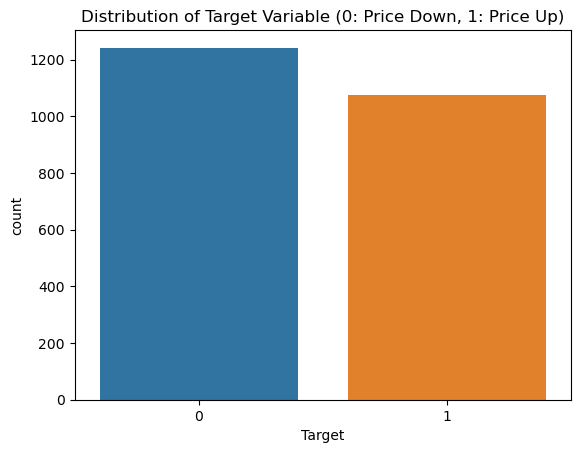

In [292]:
sns.countplot(x='Target', data=data)
plt.title('Distribution of Target Variable (0: Price Down, 1: Price Up)')
plt.show()


In [293]:
# Feature selection 
X = data[['SMA_50', 'SMA_200', 'Upper_Band', 'Lower_Band']] 
y = data['Target']

In [294]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [295]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [296]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [297]:
model = xgb.XGBClassifier()

In [298]:
param_grid = {
    'n_estimators': [50, 100, 180, 200],  # Number of boosting rounds
    'max_depth': [3, 5, 7, 9, 18, 1],  # Maximum depth of each tree
    'learning_rate': [0.1, 0.01, 0.001],  # Step size shrinkage used in update to prevents overfitting
    'subsample': [0.8, 0.9, 1.0],  # Subsample ratio of the training instances
    'colsample_bytree': [0.8, 0.9, 0.5, 1.0],  # Subsample ratio of columns when constructing each 1   
    
}

In [299]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 0.9, 0.5, 1.0],
                         'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 9, 18, 1],
                         'n_estimators': [50, 100, 180, 200],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='accuracy')

In [300]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [301]:
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [327]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) 
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) 
from keras.optimizers import Adam
optimizer = Adam(learning_rate=0.0005)  # Adjust the learning rate
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])



In [328]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/100
29/29 [==============================] - 3s 28ms/step - loss: 0.6930 - accuracy: 0.5127 - val_loss: 0.6917 - val_accuracy: 0.5754
Epoch 2/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6926 - accuracy: 0.5262 - val_loss: 0.6910 - val_accuracy: 0.5754
Epoch 3/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6923 - accuracy: 0.5267 - val_loss: 0.6902 - val_accuracy: 0.5754
Epoch 4/100
29/29 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.5262 - val_loss: 0.6898 - val_accuracy: 0.5754
Epoch 5/100
29/29 [==============================] - 0s 6ms/step - loss: 0.6921 - accuracy: 0.5246 - val_loss: 0.6889 - val_accuracy: 0.5754
Epoch 6/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5262 - val_loss: 0.6887 - val_accuracy: 0.5754
Epoch 7/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6916 - accuracy: 0.5240 - val_loss: 0.6883 - val_accuracy: 0.5754
Epoch 8/100


Epoch 59/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6888 - accuracy: 0.5397 - val_loss: 0.6932 - val_accuracy: 0.5388
Epoch 60/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6888 - accuracy: 0.5380 - val_loss: 0.6914 - val_accuracy: 0.5560
Epoch 61/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6893 - accuracy: 0.5445 - val_loss: 0.6923 - val_accuracy: 0.5560
Epoch 62/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6889 - accuracy: 0.5429 - val_loss: 0.6924 - val_accuracy: 0.5560
Epoch 63/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6892 - accuracy: 0.5418 - val_loss: 0.6917 - val_accuracy: 0.5539
Epoch 64/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6894 - accuracy: 0.5402 - val_loss: 0.6933 - val_accuracy: 0.5496
Epoch 65/100
29/29 [==============================] - 0s 5ms/step - loss: 0.6896 - accuracy: 0.5391 - val_loss: 0.6929 - val_accuracy: 0.5496
Epoch 

In [329]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

from sklearn.metrics import accuracy_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)

15/15 [==============================] - 1s 1ms/step
Accuracy: 0.5560344827586207
Confusion Matrix:
 [[237  30]
 [176  21]]


In [332]:
print(y_pred.shape)

(464, 1)


In [333]:
y_pred = y_pred.flatten()

In [334]:
import pandas as pd
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [335]:
data['Daily_Return'] = data['Close'].pct_change()

In [340]:
results['Daily_Return'] = data['Daily_Return'].shift(-1)

In [341]:
results['Strategy_Return'] = results['Daily_Return'] * np.where(results['Predicted'] == 1, 1, -1)

In [342]:
results['Market_Cumulative_Return'] = (1 + results['Daily_Return']).cumprod() - 1
results['Strategy_Cumulative_Return'] = (1 + results['Strategy_Return']).cumprod() - 1

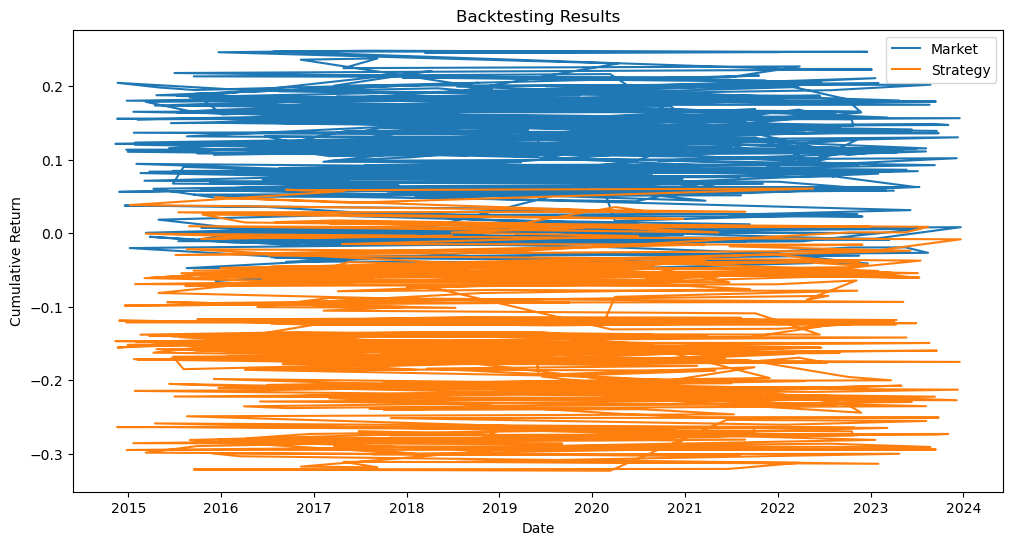

In [343]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(results['Market_Cumulative_Return'], label='Market')
plt.plot(results['Strategy_Cumulative_Return'], label='Strategy')
plt.legend()
plt.title('Backtesting Results')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.show()